# Aim: To identify the molecular, metallic and solvent features most relevant to binding affinity prediction

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

In [3]:
import seaborn as sns

In [4]:
df=pd.read_excel(r'C:\Users\HP\Desktop\Keshav\lanthanide series - dataset (practice).xlsx')
df

,Molecule,Isomer,Metal,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm+++,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [5]:
df.head(10)

,Molecule,Isomer,Metal,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce+++,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,1.963961,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.000000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
5,BrO3,Bromate,Tb+++,NaClO4,-1,2.323790,8.000000,3.577350,1.602709,3.188706,...,1.81,1.10,0.923,73.3,2499,122.4,403,293,0.1,0.54
6,C10H10O2,1Phenylbutane13dioneC6H5COCH2COCH3,Ce+++,NaClO4,0,3.575810,631.646695,17.618802,15.816497,5.816497,...,1.84,1.12,1.034,72.0,2499,122.4,403,293,0.1,6.17
7,C10H10O2,1Phenylbutane13dioneC6H5COCH2COCH3,Eu+++,KNO3,0,3.575810,631.646695,17.618802,15.816497,5.816497,...,1.83,1.20,0.950,77.8,2109,101.1,607,298,0.1,6.89
8,C10H10O6,12PhenylenedioxodiethanoicacidC6H4OCH2COOH2,Ce+++,NaClO4,0,3.585355,674.746971,20.447229,17.449490,7.449490,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,0.1,4.16
9,C10H10O6,12PhenylenedioxodiethanoicacidC6H4OCH2COOH2,Eu+++,NaClO4,0,3.585355,674.746971,20.447229,17.449490,7.449490,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,0.1,4.60


In [6]:
df.shape

(6583, 107)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Columns: 107 entries, Molecule to Log K1
dtypes: float64(86), int64(17), object(4)
memory usage: 5.4+ MB


In [8]:
df.isnull().sum()

Molecule                     0
Isomer                       0
Metal                        0
Medium                       0
Molecular Charge             0
                            ..
Molar Mass_medium (g/mol)    0
Melting Point_medium (K)     0
Temperature (K)              0
Concentration (M)            0
Log K1                       0
Length: 107, dtype: int64

In [9]:
df.dropna(inplace=True)
df

,Molecule,Isomer,Metal,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm+++,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [10]:
df.dtypes

Molecule                      object
Isomer                        object
Metal                         object
Medium                        object
Molecular Charge               int64
                              ...   
Molar Mass_medium (g/mol)    float64
Melting Point_medium (K)       int64
Temperature (K)                int64
Concentration (M)            float64
Log K1                       float64
Length: 107, dtype: object

In [11]:
df.describe()

,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),Chi1v(m),Chi2n(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,...,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,-0.071754,4.924970,726.201185,23.074497,20.283301,7.472869,12.680317,9.728329,3.774113,2.158385,...,1.823892,1.161818,0.942010,70.800912,2152.134843,127.151900,585.055336,297.894649,0.350562,7.853162
std,0.357830,1.973571,597.020415,15.253177,14.029496,4.650318,8.264730,6.940875,2.673951,1.530172,...,0.043418,0.060594,0.056884,6.201848,442.918746,83.707449,264.185732,3.943458,1.092718,5.822315
min,-8.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,...,1.740000,1.000000,0.848000,51.000000,830.000000,58.400000,253.000000,283.000000,0.010000,-1.400000
25%,0.000000,3.565686,306.644115,12.455665,10.449490,4.119172,6.912790,5.001027,1.816497,1.074915,...,1.790000,1.120000,0.894000,69.500000,1984.000000,88.100000,403.000000,298.000000,0.100000,3.282500
50%,0.000000,4.680168,535.528023,18.249818,15.724745,5.909275,10.133463,7.587117,2.881855,1.769996,...,1.820000,1.170000,0.938000,72.000000,2165.000000,122.400000,403.000000,298.000000,0.100000,5.850000
75%,0.000000,6.159538,1007.780662,32.576986,29.041241,10.160414,18.056290,14.214506,5.263710,2.927266,...,1.850000,1.200000,0.995000,74.000000,2499.000000,122.400000,607.000000,298.000000,0.200000,11.400000
max,0.000000,11.123800,11154.722560,199.844876,186.109681,69.687390,113.532865,96.073770,43.112072,25.071014,...,1.900000,1.250000,1.034000,77.800000,2499.000000,404.200000,1074.000000,373.000000,75.000000,30.660000


In [12]:
df.isnull().values.any()

False

In [13]:
#feature engineering
#Filling all missing values with 0
data = df.fillna(0)
#Filling missing values with medians of the columns
data = df.fillna(df.median())
data

C:\Users\HP\AppData\Local\Temp/ipykernel_936/695633949.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = df.fillna(df.median())


,Molecule,Isomer,Metal,Medium,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Br,Bromide,Ce+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Br,Bromide,Eu+++,NaClO4,-1,0.000000,0.000000,0.00000,0.377964,1.963961,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,BrO3,Bromate,Eu+++,NaClO4,-1,2.323790,8.000000,3.57735,1.602709,3.188706,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,SO4,Sulfate,Pm+++,NaClO4,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,SO4,Sulfate,Ce+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,SO4,Sulfate,Eu+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,SO4,Sulfate,Tb+++,NaCl,-2,4.062942,86.816358,4.50000,2.041241,2.857738,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [14]:
df.columns.value_counts().sum()

107

In [15]:
columns=df.columns.values
columns 

array(['Molecule', 'Isomer', 'Metal', 'Medium', 'Molecular Charge',
       'BalabanJ(m)', 'BertzCT(m)', 'Chi0(m)', 'Chi0n(m)', 'Chi0v(m)',
       'Chi1(m)', 'Chi1n(m)', 'Chi1v(m)', 'Chi2n(m)', 'Chi2v(m)',
       'Chi3n(m)', 'Chi3v(m)', 'Chi4n(m)', 'Chi4v(m)', 'EState_VSA1(m)',
       'EState_VSA10(m)', 'EState_VSA8(m)', 'EState_VSA9(m)',
       'ExactMolWt(m)', 'FpDensityMorgan1(m)', 'FpDensityMorgan2(m)',
       'FpDensityMorgan3(m)', 'FractionCSP3(m)', 'HallKierAlpha(m)',
       'HeavyAtomCount(m)', 'HeavyAtomMolWt(m)', 'Kappa1(m)', 'Kappa2(m)',
       'Kappa3(m)', 'LabuteASA(m)', 'MaxAbsEStateIndex(m)',
       'MaxAbsPartialCharge(m)', 'MaxEStateIndex(m)',
       'MaxPartialCharge(m)', 'MinAbsEStateIndex(m)',
       'MinAbsPartialCharge(m)', 'MinEStateIndex(m)',
       'MinPartialCharge(m)', 'MolLogP(m)', 'MolMR(m)', 'MolWt(m)',
       'NHOHCount(m)', 'NOCount(m)', 'NumHAcceptors(m)', 'NumHDonors(m)',
       'NumHeteroatoms(m)', 'NumRotatableBonds(m)',
       'NumValenceElectrons(m)

In [16]:
df.drop(['Molecule','Isomer','Medium'],axis=1, inplace=True)
df.head(2)

,Metal,Molecular Charge,BalabanJ(m),BertzCT(m),Chi0(m),Chi0n(m),Chi0v(m),Chi1(m),Chi1n(m),Chi1v(m),...,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),Density_medium (kg/m3),Molar Mass_medium (g/mol),Melting Point_medium (K),Temperature (K),Concentration (M),Log K1
0,Ce+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.2
1,Eu+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.2


In [17]:
df['Metal'].unique()

array(['Ce+++     ', 'Eu+++     ', 'Tb+++     ', 'Dy+++     ',
       'Er+++     ', 'Gd+++     ', 'Ho+++     ', 'Lu+++     ',
       'Nd+++     ', 'Pr+++     ', 'Sm+++     ', 'Tm+++     ',
       'Yb+++     ', 'Ce++++    ', 'Pm+++     '], dtype=object)

In [18]:
df['Log K1'].unique()

array([-0.2 ,  0.21,  0.62, ...,  1.37,  1.29,  1.09])

In [19]:
# loop through datatset to find count of unique values of each column
for x in df.columns:
    print(x,':',len(df[x].unique()))

Metal : 15
Molecular Charge : 8
BalabanJ(m) : 654
BertzCT(m) : 641
Chi0(m) : 485
Chi0n(m) : 507
Chi0v(m) : 445
Chi1(m) : 541
Chi1n(m) : 546
Chi1v(m) : 503
Chi2n(m) : 575
Chi2v(m) : 593
Chi3n(m) : 595
Chi3v(m) : 606
Chi4n(m) : 570
Chi4v(m) : 581
EState_VSA1(m) : 577
EState_VSA10(m) : 78
EState_VSA8(m) : 146
EState_VSA9(m) : 339
ExactMolWt(m) : 556
FpDensityMorgan1(m) : 272
FpDensityMorgan2(m) : 303
FpDensityMorgan3(m) : 348
FractionCSP3(m) : 94
HallKierAlpha(m) : 257
HeavyAtomCount(m) : 56
HeavyAtomMolWt(m) : 457
Kappa1(m) : 559
Kappa2(m) : 568
Kappa3(m) : 598
LabuteASA(m) : 596
MaxAbsEStateIndex(m) : 672
MaxAbsPartialCharge(m) : 605
MaxEStateIndex(m) : 672
MaxPartialCharge(m) : 638
MinAbsEStateIndex(m) : 676
MinAbsPartialCharge(m) : 636
MinEStateIndex(m) : 674
MinPartialCharge(m) : 603
MolLogP(m) : 623
MolMR(m) : 624
MolWt(m) : 556
NHOHCount(m) : 13
NOCount(m) : 24
NumHAcceptors(m) : 22
NumHDonors(m) : 13
NumHeteroatoms(m) : 26
NumRotatableBonds(m) : 30
NumValenceElectrons(m) : 130
PEO

In [20]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Metal                        0
Molecular Charge             0
BalabanJ(m)                  0
BertzCT(m)                   0
Chi0(m)                      0
                            ..
Molar Mass_medium (g/mol)    0
Melting Point_medium (K)     0
Temperature (K)              0
Concentration (M)            0
Log K1                       0
Length: 104, dtype: int64

In [21]:
df['Metal'].unique()

array(['Ce+++     ', 'Eu+++     ', 'Tb+++     ', 'Dy+++     ',
       'Er+++     ', 'Gd+++     ', 'Ho+++     ', 'Lu+++     ',
       'Nd+++     ', 'Pr+++     ', 'Sm+++     ', 'Tm+++     ',
       'Yb+++     ', 'Ce++++    ', 'Pm+++     '], dtype=object)

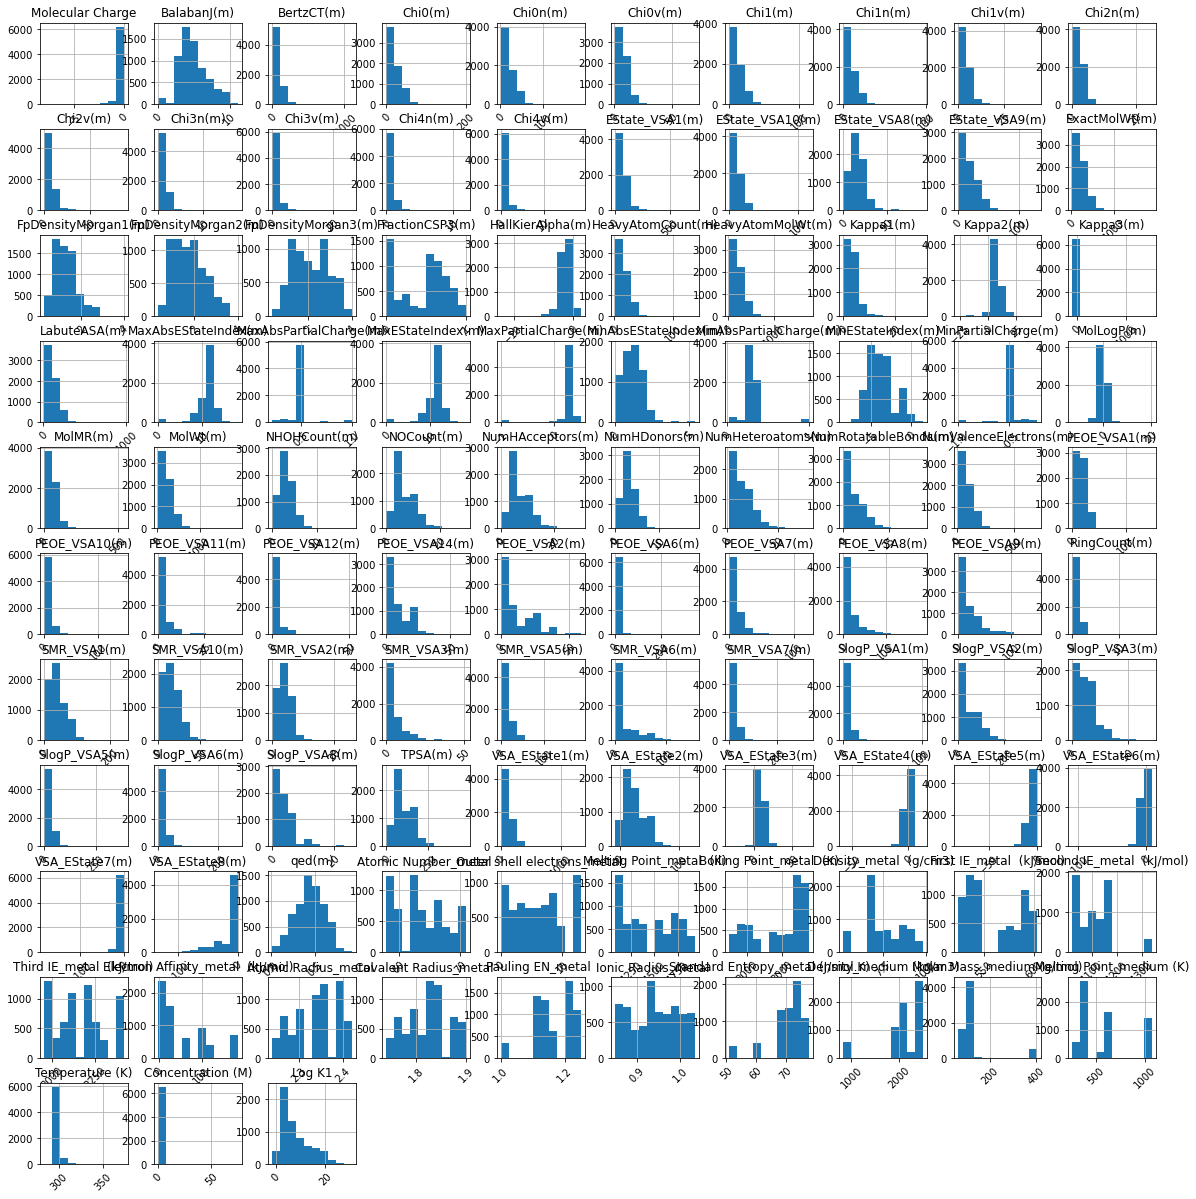

In [22]:
import matplotlib.pyplot as plt 
df.hist(figsize=(20,21), xrot=45)
plt.show()

GridSpec(6, 1)

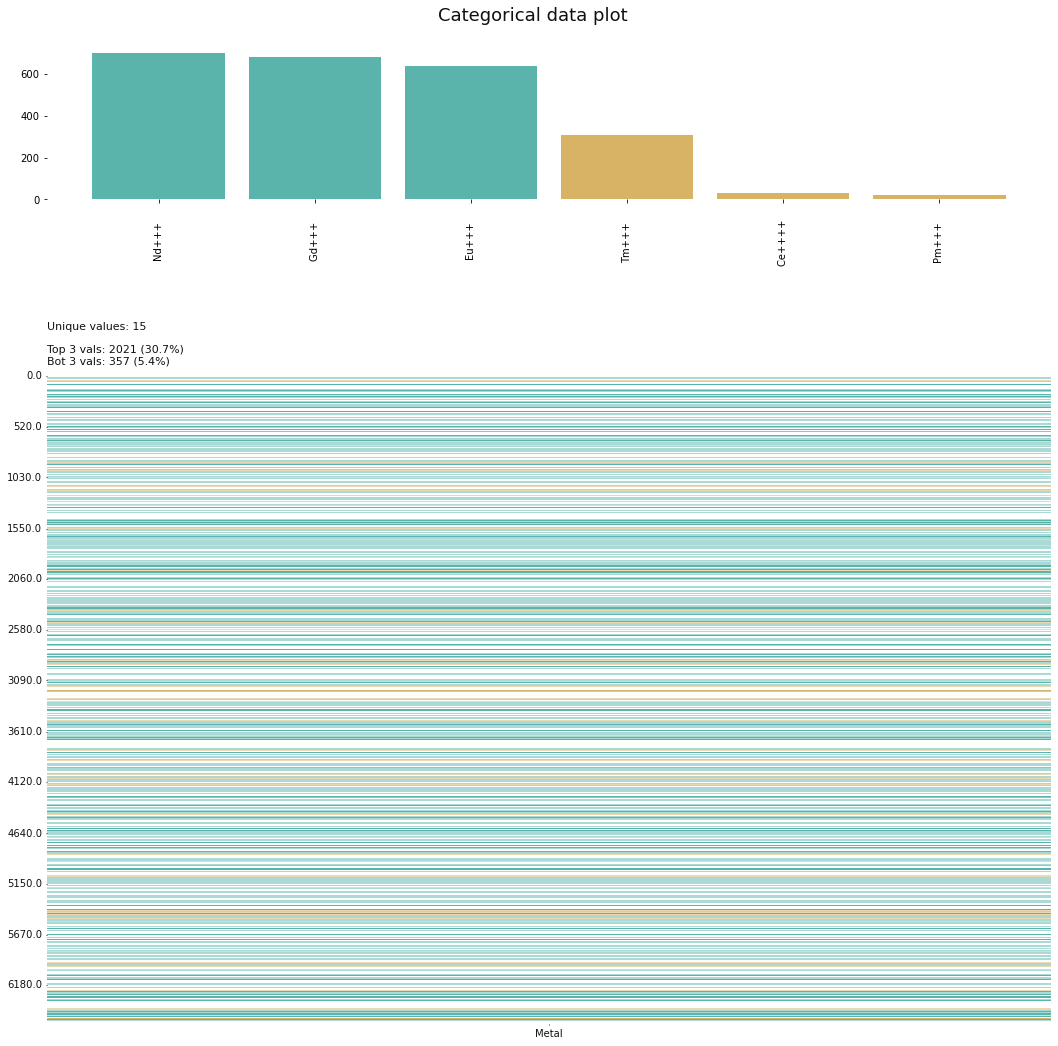

In [23]:
import klib
klib.cat_plot(df)

Note: The number of non binary numerical features is very large (103), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='ExactMolWt(m)', ylabel='Density'>

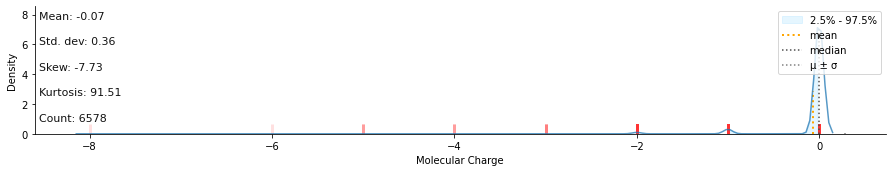

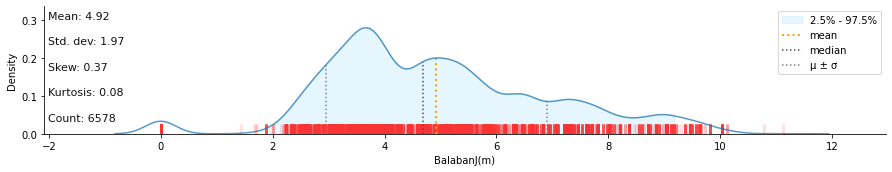

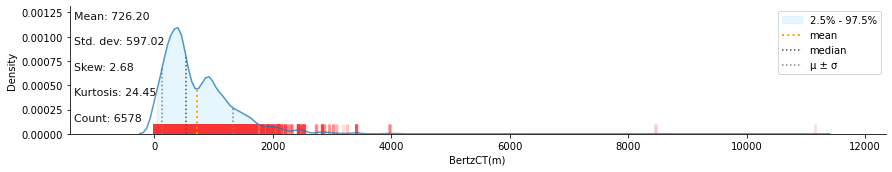

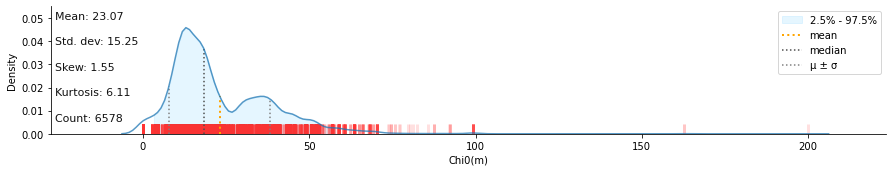

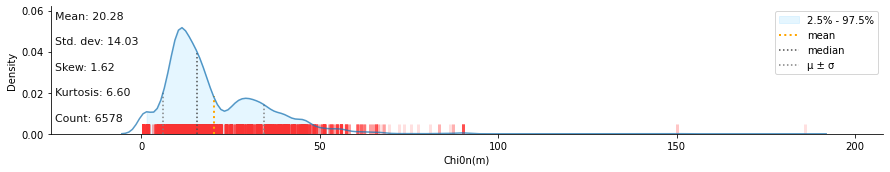

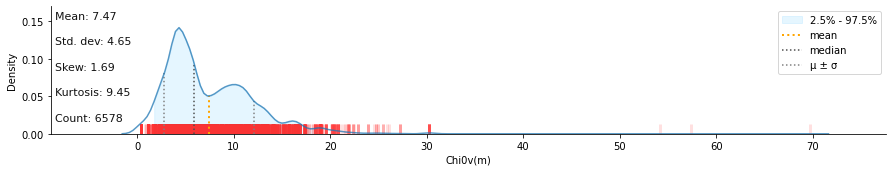

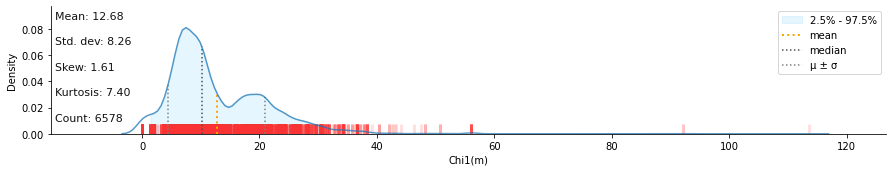

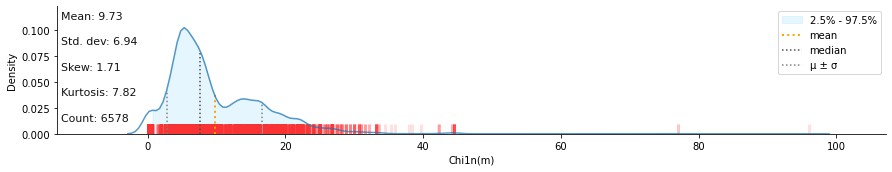

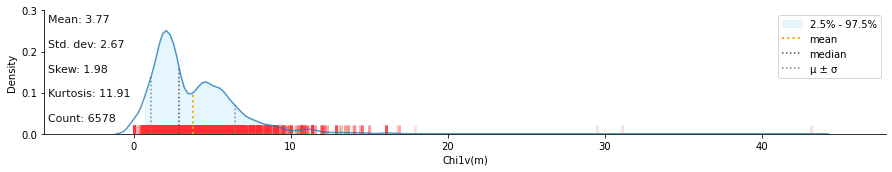

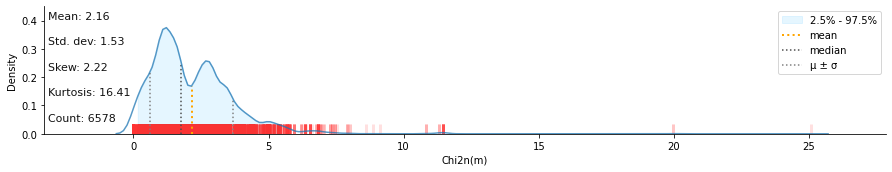

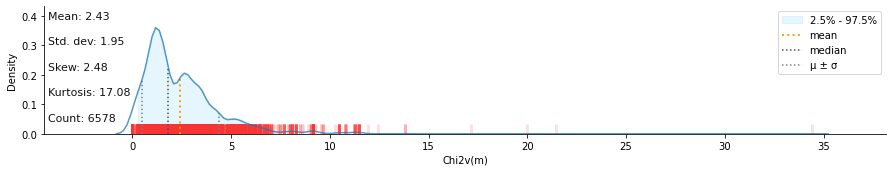

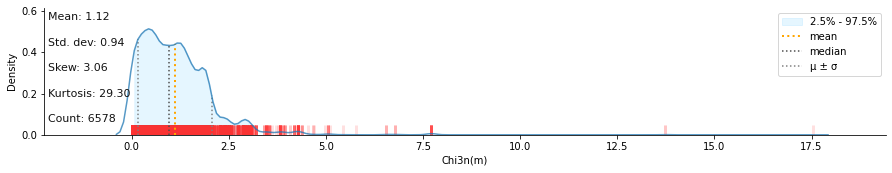

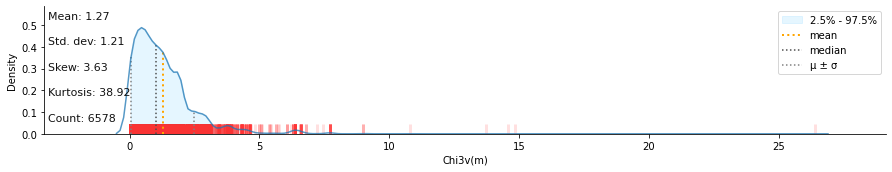

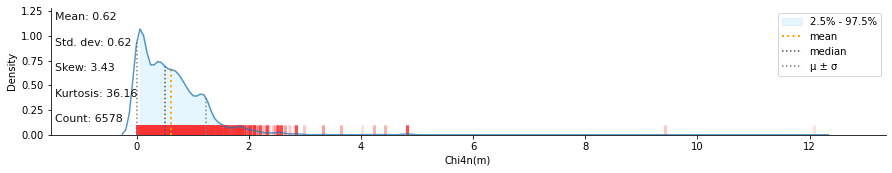

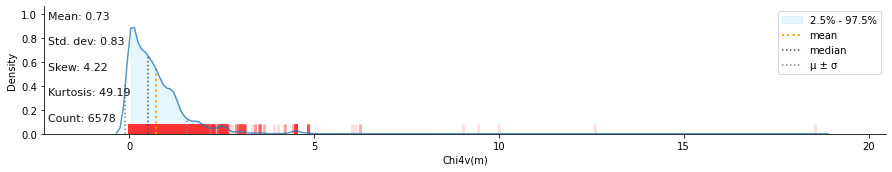

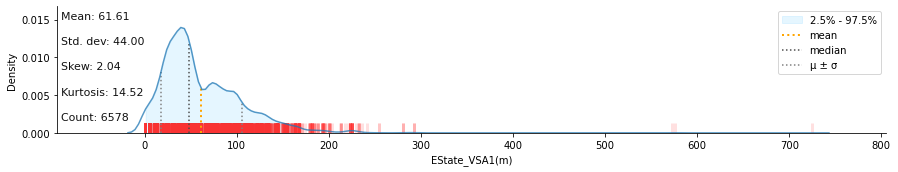

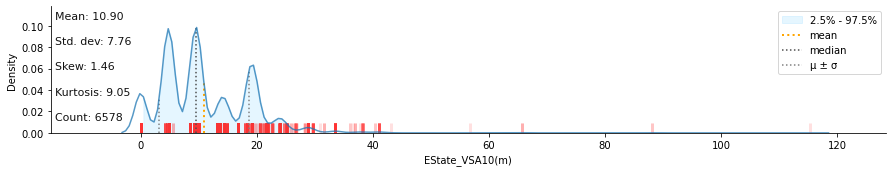

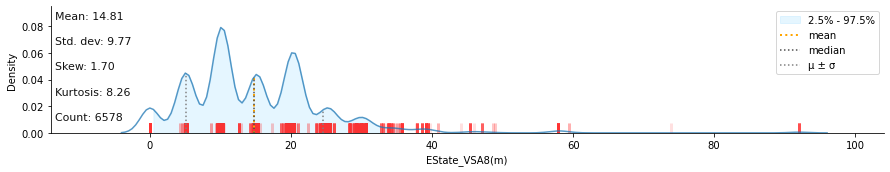

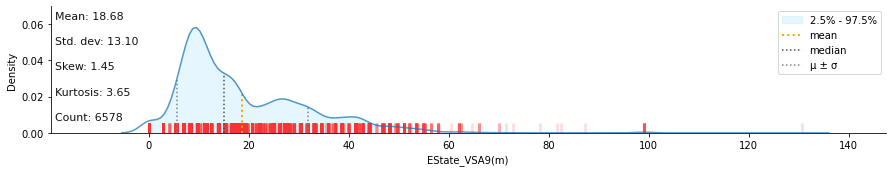

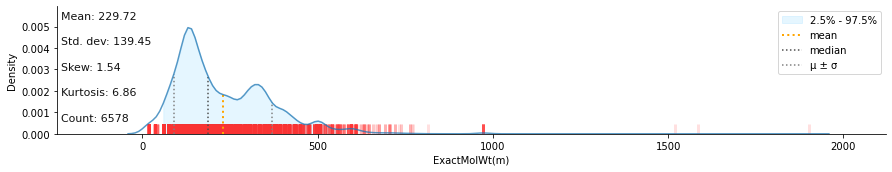

In [24]:
klib.dist_plot(df)

In [25]:
klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming the following columns ['outer_shell_electrons_metal', 'electron_affinity_metal_k_j_mol', 'standard_entropy_metal_j_mol_k'].
Shape of cleaned data: (6387, 104)Remaining NAs: 0

Changes:
Dropped rows: 191
     of which 191 duplicates. (Rows: [637, 656, 1308, 1320, 1325, 1327, 1329, 1331, 1333, 1335, 1337, 1341, 1343, 1345, 1408, 1410, 1412, 1414, 1417, 1419, 1421, 1423, 1425, 1427, 1429, 1505, 1506, 1507, 1508, 1511, 1512, 1513, 1514, 1516, 1517, 1518, 1519, 1521, 1522, 1523, 1630, 1675, 1920, 2057, 2351, 2634, 2659, 2661, 2663, 2710, 2769, 2771, 2776, 2779, 2780, 2782, 2785, 2786, 2788, 2791, 2793, 2894, 2895, 2917, 2923, 2928, 2951, 3001, 3104, 3106, 3107, 3111, 3113, 3114, 3116, 3117, 3119, 3120, 3122, 3123, 3125, 3127, 3163, 3165, 3167, 3169, 3178, 3210, 3212, 3214, 3216, 3220, 3222, 3224, 3228, 3230, 3232, 3239, 3253, 3258, 3267, 3269, 3274, 3276, 3362, 3367, 3371, 3376, 3380, 3386, 3534, 3537, 3541, 3544, 3546, 3548, 35

,metal,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,chi1v_m,...,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m,log_k1
0,Ce+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.84,1.12,1.034,72.0,2499,122.400002,403,298,1.0,-0.2
1,Eu+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,-0.2
2,Eu+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,0.21
3,Eu+++,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,293,0.1,0.62
4,Eu+++,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,Pm+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.86,1.13,0.979,71.599998,2499,122.400002,403,328,2.0,1.6
6383,Ce+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.84,1.12,1.034,72.0,2165,58.400002,1074,298,1.0,1.57
6384,Eu+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.83,1.2,0.95,77.800003,2165,58.400002,1074,298,1.0,1.53
6385,Tb+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.81,1.1,0.923,73.300003,2165,58.400002,1074,298,1.0,1.38


In [27]:
klib.clean_column_names(df)

Long column names detected (>25 characters). Consider renaming the following columns ['outer_shell_electrons_metal', 'electron_affinity_metal_k_j_mol', 'standard_entropy_metal_j_mol_k'].


,metal,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,chi1v_m,...,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m,log_k1
0,Ce+++,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,0.000000,...,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0,-0.20
1,Eu+++,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,0.000000,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,-0.20
2,Eu+++,-1,0.000000,0.000000,0.00000,0.377964,1.963961,0.000000,0.000000,0.000000,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.21
3,Eu+++,-1,2.323790,8.000000,3.57735,1.602709,3.188706,1.732051,0.462910,2.405351,...,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1,0.62
4,Eu+++,-1,2.323790,8.000000,3.57735,1.602709,3.188706,1.732051,0.462910,2.405351,...,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Pm+++,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,2.000000,...,1.86,1.13,0.979,71.6,2499,122.4,403,328,2.0,1.60
6579,Ce+++,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,2.000000,...,1.84,1.12,1.034,72.0,2165,58.4,1074,298,1.0,1.57
6580,Eu+++,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,2.000000,...,1.83,1.20,0.950,77.8,2165,58.4,1074,298,1.0,1.53
6581,Tb+++,-2,4.062942,86.816358,4.50000,2.041241,2.857738,2.000000,0.666667,2.000000,...,1.81,1.10,0.923,73.3,2165,58.4,1074,298,1.0,1.38


In [28]:
df_train=klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578 entries, 0 to 6582
Columns: 104 entries, metal to log_k1
dtypes: Float32(86), category(1), int16(7), int8(10)
memory usage: 3.2 MB


In [29]:
klib.mv_col_handling(df_train)

,metal,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,chi1v_m,...,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m,log_k1
0,Ce+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.84,1.12,1.034,72.0,2499,122.400002,403,298,1.0,-0.2
1,Eu+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,-0.2
2,Eu+++,-1,0.0,0.0,0.0,0.377964,1.963961,0.0,0.0,0.0,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,0.21
3,Eu+++,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,293,0.1,0.62
4,Eu+++,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,1.83,1.2,0.95,77.800003,2499,122.400002,403,298,1.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Pm+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.86,1.13,0.979,71.599998,2499,122.400002,403,328,2.0,1.6
6579,Ce+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.84,1.12,1.034,72.0,2165,58.400002,1074,298,1.0,1.57
6580,Eu+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.83,1.2,0.95,77.800003,2165,58.400002,1074,298,1.0,1.53
6581,Tb+++,-2,4.062943,86.81636,4.5,2.041241,2.857738,2.0,0.666667,2.0,...,1.81,1.1,0.923,73.300003,2165,58.400002,1074,298,1.0,1.38


In [30]:
#correlation 
# Using pandas
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_936/3199908406.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


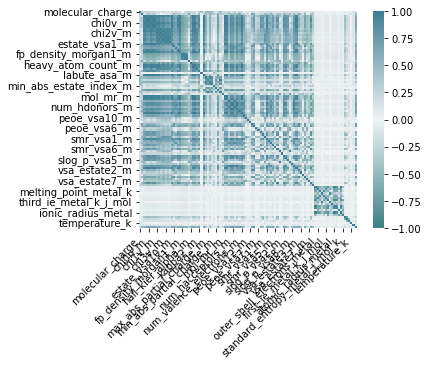

In [31]:
# Using seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 220, n=800),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<b>Preprocessing Task before Model Building</b>

In [32]:
#1) Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df["metal"])

In [53]:
label

array([ 0,  4,  4, ...,  4, 12, 14])

In [54]:
#label encoding 
df['metal']=df['metal'].replace("Ce","0")

In [55]:
df['metal']=df['metal'].replace("Tb","2")

In [56]:

df['metal']=df['metal'].replace("Dy","3")

In [57]:

df['metal']=df['metal'].replace("Er","4")

In [58]:
df['metal']=df['metal'].replace("Gd","5")

In [59]:
df['metal']=df['metal'].replace("Ho","6")

In [60]:
df['metal']=df['metal'].replace("Lu","7")

In [61]:
df['metal']=df['metal'].replace("Nd","8")

In [62]:

df['metal']=df['metal'].replace("Pr","9")


In [63]:

df['metal']=df['metal'].replace("Sm","10")

In [64]:
df['metal']=df['metal'].replace("Tm","11")

In [65]:

df['metal']=df['metal'].replace("Yb","12")

In [66]:
df['metal']=df['metal'].replace("Ce","13")

In [67]:

df['metal']=df['metal'].replace("Pm","14")


In [68]:
df['metal']=label

In [69]:
df["metal"].unique()

array([ 0,  4, 12,  2,  3,  5,  6,  7,  8, 10, 11, 13, 14,  1,  9])

<b> Splitting our data into train and test</b>

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:103]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [74]:
X.head()

,metal,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,chi1v_m,...,atomic_radius_metal,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m
0,0,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,0.000000,...,2.42,1.84,1.12,1.034,72.0,2499,122.4,403,298,1.0
1,4,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,0.000000,...,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0
2,4,-1,0.00000,0.0,0.00000,0.377964,1.963961,0.000000,0.00000,0.000000,...,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0
3,4,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,293,0.1
4,4,-1,2.32379,8.0,3.57735,1.602709,3.188706,1.732051,0.46291,2.405351,...,2.35,1.83,1.20,0.950,77.8,2499,122.4,403,298,1.0


In [75]:
y.head()

0   -0.20
1   -0.20
2    0.21
3    0.62
4    0.03
Name: log_k1, dtype: float64

In [76]:
def scale_data(df,col):
  from numpy import asarray
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [78]:
X_train.shape

(5262, 103)

In [79]:
y_train.shape

(5262,)

<b>Standardization</b>

In [80]:
X.describe()

,metal,molecular_charge,balaban_j_m,bertz_ct_m,chi0_m,chi0n_m,chi0v_m,chi1_m,chi1n_m,chi1v_m,...,atomic_radius_metal,covalent_radius_metal,pauling_en_metal,ionic_radius_metal,standard_entropy_metal_j_mol_k,density_medium_kg_m3,molar_mass_medium_g_mol,melting_point_medium_k,temperature_k,concentration_m
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,...,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,6.976589,-0.071754,4.924970,726.201185,23.074497,20.283301,7.472869,12.680317,9.728329,3.774113,...,2.339991,1.823892,1.161818,0.942010,70.800912,2152.134843,127.151900,585.055336,297.894649,0.350562
std,4.160465,0.357830,1.973571,597.020415,15.253177,14.029496,4.650318,8.264730,6.940875,2.673951,...,0.052140,0.043418,0.060594,0.056884,6.201848,442.918746,83.707449,264.185732,3.943458,1.092718
min,0.000000,-8.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,...,2.240000,1.740000,1.000000,0.848000,51.000000,830.000000,58.400000,253.000000,283.000000,0.010000
25%,4.000000,0.000000,3.565686,306.644115,12.455665,10.449490,4.119172,6.912790,5.001027,1.816497,...,2.300000,1.790000,1.120000,0.894000,69.500000,1984.000000,88.100000,403.000000,298.000000,0.100000
50%,7.000000,0.000000,4.680168,535.528023,18.249818,15.724745,5.909275,10.133463,7.587117,2.881855,...,2.340000,1.820000,1.170000,0.938000,72.000000,2165.000000,122.400000,403.000000,298.000000,0.100000
75%,11.000000,0.000000,6.159538,1007.780662,32.576986,29.041241,10.160414,18.056290,14.214506,5.263710,...,2.390000,1.850000,1.200000,0.995000,74.000000,2499.000000,122.400000,607.000000,298.000000,0.200000
max,14.000000,0.000000,11.123800,11154.722560,199.844876,186.109681,69.687390,113.532865,96.073770,43.112072,...,2.420000,1.900000,1.250000,1.034000,77.800000,2499.000000,404.200000,1074.000000,373.000000,75.000000


In [81]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [82]:
X_train_std= sc.fit_transform(X_train)

In [83]:
X_test_std= sc.transform(X_test)

In [84]:
X_train_std

array([[ 0.97356013,  0.1950473 ,  0.45949914, ..., -0.69257162,
         0.01698716, -0.21336145],
       [ 0.25155411,  0.1950473 ,  0.32687709, ...,  0.07711907,
         0.01698716, -0.21336145],
       [ 0.25155411,  0.1950473 ,  0.50155712, ...,  1.72214426,
         0.01698716, -0.21336145],
       ...,
       [ 0.73289145,  0.1950473 ,  0.31132226, ..., -0.69257162,
         1.2381134 , -0.21336145],
       [-0.71112059,  0.1950473 , -0.5180479 , ..., -0.02097876,
        -1.20413908,  0.54870924],
       [ 1.2142288 ,  0.1950473 , -0.6796311 , ..., -0.69257162,
        -1.20413908, -0.21336145]])

In [85]:
X_test_std

array([[ 0.73289145,  0.1950473 ,  0.4329945 , ...,  0.07711907,
         0.01698716, -0.21336145],
       [-0.47045191,  0.1950473 , -0.64637518, ...,  0.07711907,
         2.45923964, -0.21336145],
       [ 0.25155411,  0.1950473 ,  2.00166103, ...,  0.07711907,
        -1.20413908, -0.21336145],
       ...,
       [-0.47045191,  0.1950473 ,  0.36600956, ..., -1.25852065,
         0.01698716, -0.21336145],
       [-0.22978324,  0.1950473 ,  1.38555632, ...,  0.07711907,
        -1.20413908, -0.21336145],
       [ 0.73289145,  0.1950473 , -0.68586118, ..., -0.69257162,
         0.01698716, -0.12868693]])

In [86]:
y_train

4145    3.41
2557    9.79
3847    2.25
6219    4.29
4562    7.37
        ... 
2516    6.96
6448   -0.16
3608    4.90
5706    2.30
2577    2.52
Name: log_k1, Length: 5262, dtype: float64

In [87]:
y_test

3786     2.95
2601     6.56
889     17.77
4599     3.79
2927     4.92
        ...  
3767     3.52
5282     1.80
2350    12.80
6093    11.47
4744     9.48
Name: log_k1, Length: 1316, dtype: float64

# <b>Modelling</b> 

In [94]:
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(X,y): 
    return math.sqrt(((X-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train),m.score(X_test, y_test),
           median_absolute_error(m.predict(X_train), y_train),median_absolute_error(m.predict(X_test), y_test),
           metrics.mean_absolute_error(m.predict(X_train), y_train),metrics.mean_absolute_error(m.predict(X_test), y_test),
          
          ]
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')

In [95]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

RMSE-Train: 2.3896174716991254
RMSE-Test: 2.564771517975212
Score-Train: 0.8265830327171487
Score-Test: 0.8252744481194848
MedAE-Train: 1.3687422823905941
MedAE-Test: 1.41817498922348
MeanAE-Train: 1.7674690462400233
MeanAE-Test: 1.8532005120827435 



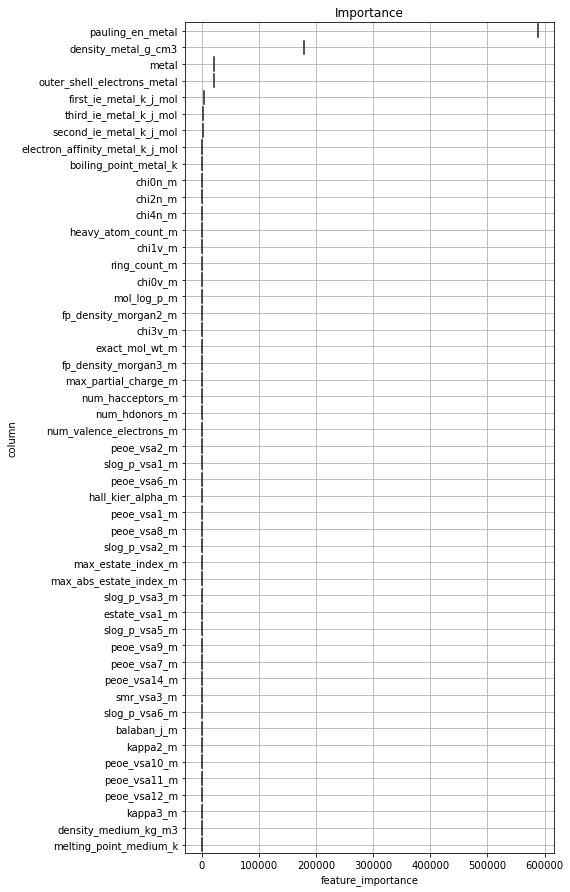

In [96]:
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train,y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, X_train)

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [98]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

NameError: name 'y_pred_lr' is not defined

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [100]:
rf.fit(X_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [102]:
y_pred_rf= rf.predict(X_test_std)

In [103]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.9737237827303517
0.45238370349000456
0.994607875725612


In [104]:
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()

# print score of the model
knnr.fit(X_train.iloc[1:10000], y_train.iloc[1:10000])

# print score of the model
print_score(knnr)

RMSE-Train: 2.841931220883804
RMSE-Test: 3.7379781838228463
Score-Train: 0.754720109659306
Score-Test: 0.6288644285239133
MedAE-Train: 1.3399999999999994
MedAE-Test: 1.7680000000000007
MeanAE-Train: 1.9953052071455721
MeanAE-Test: 2.6218920972644377 



RMSE-Train: 1.3732228864176372
RMSE-Test: 1.5911534411134347
Score-Train: 0.9427313582746609
Score-Test: 0.9327514102482319
MedAE-Train: 0.7029260712177638
MedAE-Test: 0.7419147785343605
MeanAE-Train: 0.9613963918716601
MeanAE-Test: 1.0643680262388893 



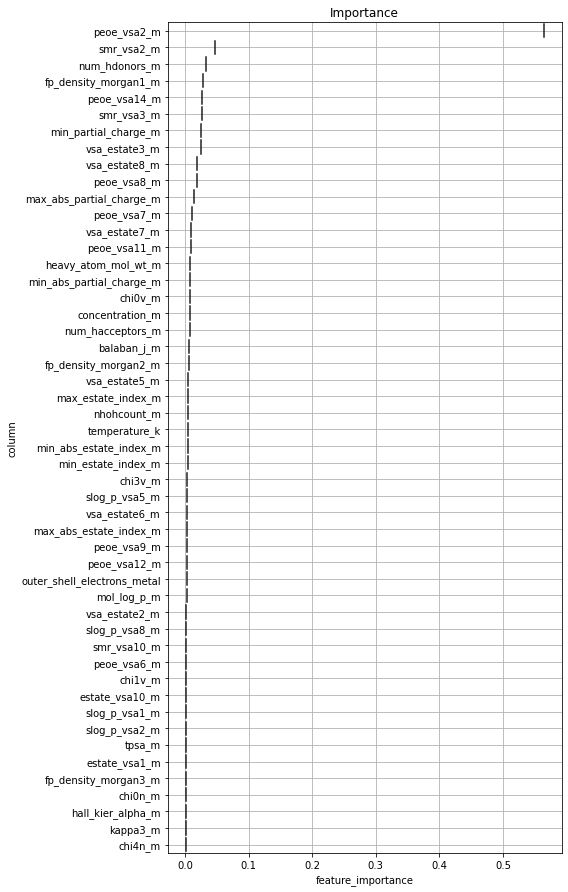

In [105]:
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, X_train.iloc[1:50000])

RMSE-Train: 1.3732228864176372
RMSE-Test: 1.5911534411134347
Score-Train: 0.9427313582746609
Score-Test: 0.9327514102482319
MedAE-Train: 0.7029260712177638
MedAE-Test: 0.7419147785343605
MeanAE-Train: 0.9613963918716601
MeanAE-Test: 1.0643680262388893 



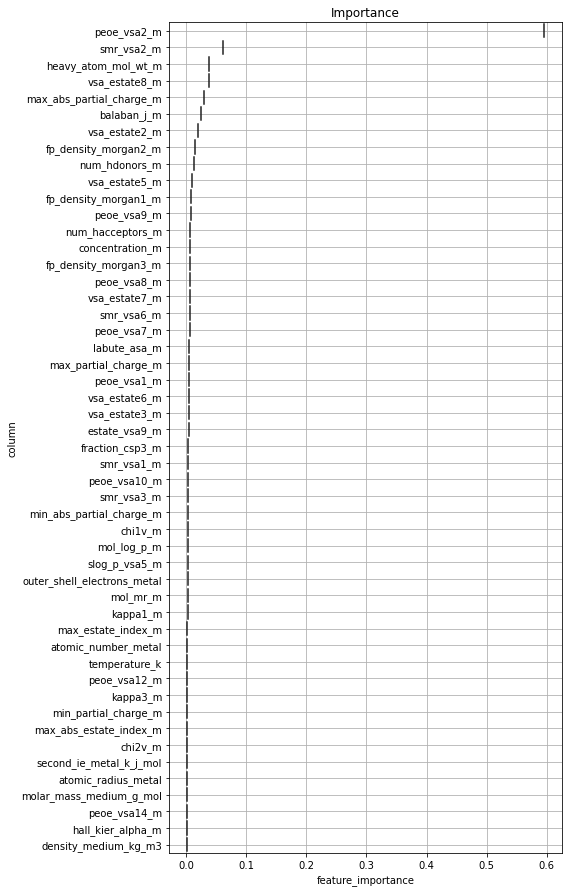

In [106]:
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_, X_train.iloc[1:50000])

RMSE-Train: 2.6833336131061625
RMSE-Test: 2.846873263438793
Score-Train: 0.7813325406722804
Score-Test: 0.7847241443635945
MedAE-Train: 2.0504401108445602
MedAE-Test: 2.078492259501859
MeanAE-Train: 2.2064039136531934
MeanAE-Test: 2.307409824345935 



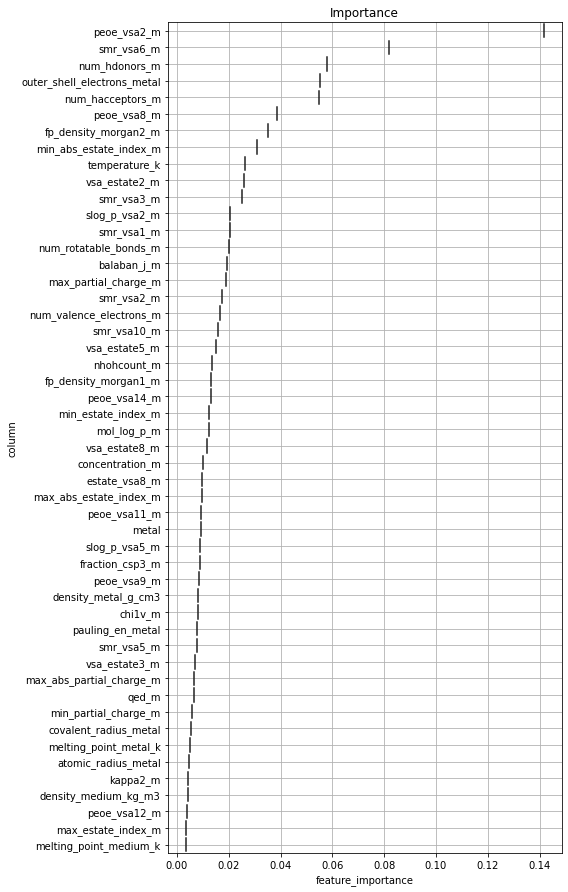

In [107]:
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()

# Instantiate the model
AdaBoost.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(AdaBoost)

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_, X_train.iloc[1:50000])

RMSE-Train: 0.531921652860145
RMSE-Test: 0.9437925319244471
Score-Train: 0.9914072899764568
Score-Test: 0.9763401422269193
MedAE-Train: 0.12818529129028322
MedAE-Test: 0.22195850849151622
MeanAE-Train: 0.23321501442611414
MeanAE-Test: 0.454653259332555 



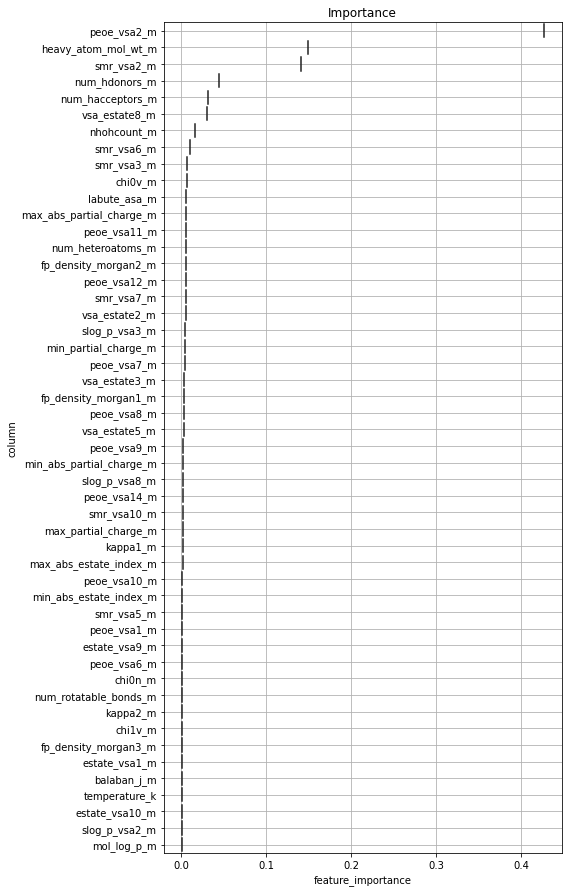

In [108]:
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

# Fit the model to the data
xgbr.fit(X_train.iloc[1:50000],y_train.iloc[1:50000])

# print score of the model
print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, X_train.iloc[1:50000])

RMSE-Train: 0.6976611205727817
RMSE-Test: 0.9658171631256844
Score-Train: 0.9852183178483237
Score-Test: 0.9752229901109464
MedAE-Train: 0.258955460348125
MedAE-Test: 0.3281910694086636
MeanAE-Train: 0.4209339149868438
MeanAE-Test: 0.5608015882728153 



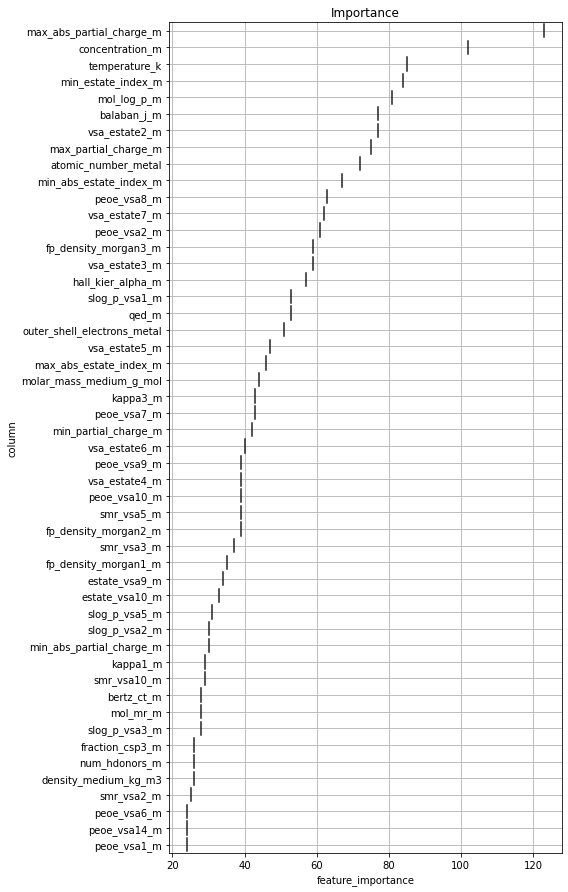

In [109]:
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()

# Fit the model to the data
lg.fit(X_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(lg)

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_, X_train.iloc[1:50000])

<b>Comparing all the models based on their metric </b>

In [111]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [112]:
import warnings
warnings.filterwarnings('ignore')
models= [lModel, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,y_train,X_test,y_test)

<b>RMSE of all model on train and test data</b>

In [113]:
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric        Lr     Dtree    Forest       Knn       GBR    Xboost  AdaBoost
0   rmse  2.389617  0.454812  8.767282  2.841931  1.373223  0.531922  2.683334


  Metric        Lr     Dtree   Forest       Knn       GBR    Xboost  AdaBoost
0   rmse  2.564772  1.203879  8.77016  3.737978  1.591153  0.943793  2.846873


<b>All metrics on train and test data</b>

In [114]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,2.564772,1.203879,8.770160,3.737978,1.591153,0.943793,2.846873
1,MedAE,1.418175,0.180000,6.856625,1.768000,0.741915,0.221959,2.078492
2,MAE,1.853201,0.512943,7.485083,2.621892,1.064368,0.454653,2.307410
3,R-squared,0.776757,0.960628,-3.075653,0.459437,0.919062,0.975227,0.613822


<b>Hyper Parameter Tuning</b>

<b>grid search</b>

In [118]:
##hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.948 using {'n_estimators': 1000}
0.941 (0.005) with: {'n_estimators': 10}
0.948 (0.003) with: {'n_estimators': 100}
0.948 (0.003) with: {'n_estimators': 1000}


In [119]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [120]:
grid_search_forest.best_score_

0.9478588603301649

In [123]:
y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [124]:
r2_score(y_test,y_pred_rf_grid)

0.9736721292922202